# Stock Profits vs Month
Question : Is there a correlation between stock profits and months? Will examine this by calculating the monthly averages of stock data over a span of 10 years.

Conclusion : Based on an analysis of data over ten years, it was found that the probability of stocks rising in July is very low, whereas in June, the probability of an increase is very high. Stock prices also showed a relatively high probability of rising in January and December.
## Monthly profits over 10 years. month (x-axis) (correlation between price and Month)

# Part 1: Find Monthly Stock Profits in US

In [1]:
# Common_Stockdata.get_stock_data Module import
from Common_Module.Common_Stockdata import get_stock_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import calendar

In [2]:
# Load the Stock DataFrame using the function from common module
stock_info_df = get_stock_data()
stock_info_df

,Date,Open,High,Low,Close,Volume,Year,Month_Number
1091,2019-12-31,211.62,212.7600,211.2000,212.61,18201585,2019,12
1092,2019-12-30,213.50,213.6300,211.1600,212.21,21829913,2019,12
1093,2019-12-27,214.54,214.5600,213.0400,213.61,18142239,2019,12
1094,2019-12-26,212.26,213.8100,212.2300,213.79,17159310,2019,12
1095,2019-12-24,212.00,212.0900,211.4400,211.92,7089020,2019,12
...,...,...,...,...,...,...,...,...
3602,2010-01-08,46.04,46.5500,45.9300,46.55,88886600,2010,1
3603,2010-01-07,46.20,46.2700,45.9200,46.17,77094100,2010,1
3604,2010-01-06,46.39,46.5500,46.0700,46.14,96033000,2010,1
3605,2010-01-05,46.38,46.5000,46.1600,46.42,62935600,2010,1


In [3]:
# Monthly Stock Profits dataFrame
# Open price for each Year, Month & Close price for each Year, Month
monthly_data = stock_info_df.groupby(['Year', 'Month_Number'])
first_open = monthly_data['Open'].first().reset_index()
last_close = monthly_data['Close'].last().reset_index()

monthly_profit = last_close['Close'] - first_open['Open']

# dataFrame creation
monthly_profit_df = pd.DataFrame({
                                    'Year': first_open['Year'],
                                    'Month_Number': first_open['Month_Number'],
                                    'Monthly_Profit': monthly_profit
                                })

# Generate month numbers (1-12)
month_numbers = list(range(1, 13))

# Use list comprehension to map month numbers to month names
month_names = [calendar.month_name[month] for month in month_numbers]

# Create the DataFrame
month_df = pd.DataFrame({
                            'Month_Number': month_numbers,
                            'Month': month_names
                        })

# Merge the DataFrames on 'Month' from monthly_profit_df and 'Month Number' from month_df
monthly_profit_merge_df = pd.merge(monthly_profit_df, month_df, left_on='Month_Number', right_on='Month_Number', how='left')

monthly_profit_final_df = monthly_profit_merge_df[["Year", "Month", "Month_Number", "Monthly_Profit"]]
monthly_profit_final_df["Year"] = monthly_profit_final_df["Year"].astype('str')

monthly_profit_final_df

,Year,Month,Month_Number,Monthly_Profit
0,2010,January,1,2.52
1,2010,February,2,-1.34
2,2010,March,3,-2.82
3,2010,April,4,-2.05
4,2010,May,5,3.99
...,...,...,...,...
115,2019,August,8,1.22
116,2019,September,9,-2.14
117,2019,October,10,-10.29
118,2019,November,11,-6.65


# Part 2: Line graph per Month over 10 years

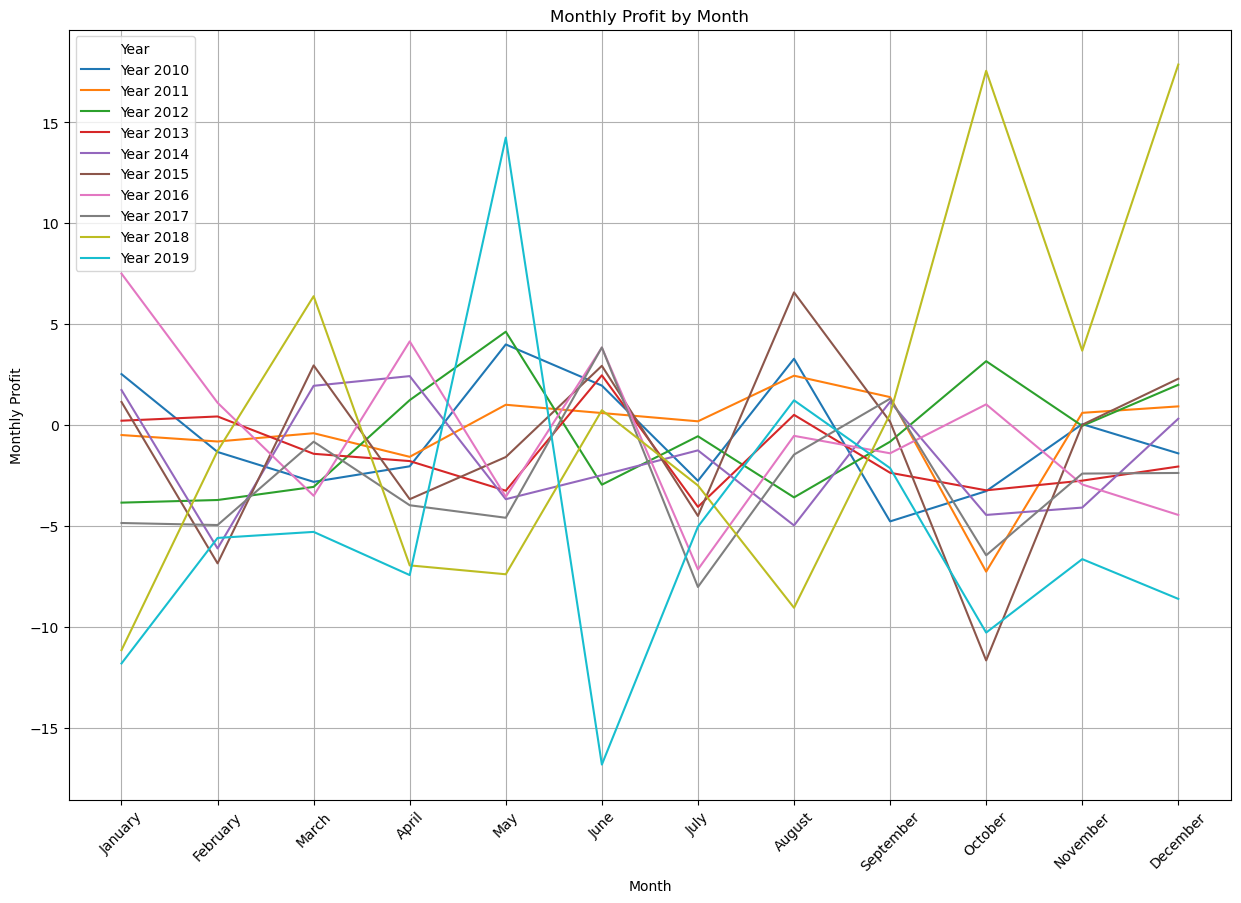

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))

# line plot for each year
years = monthly_profit_final_df['Year'].unique()

for year in years:
    filtered_df = monthly_profit_final_df.loc[monthly_profit_final_df['Year'] == year]
    plt.plot(filtered_df['Month'], filtered_df['Monthly_Profit'], label=f'Year {year}')

filtered_df

# setting Graph
ax.set_xlabel('Month')
ax.set_ylabel('Monthly Profit')
ax.set_title('Monthly Profit by Month')
ax.legend(title='Year')
plt.xticks(rotation=45)
ax.grid(True)
plt.savefig("output_data/MonthlyProfits_Month.png")
plt.show()


# Part 3: Find Monthly Stock Profits Probability per Month over 10 years

In [5]:
# Increase Probability for each Month?

# Add a new column to track positive profits
monthly_profit_final_df['Positive'] = monthly_profit_final_df['Monthly_Profit'] > 0

grouped = monthly_profit_final_df.groupby(['Month_Number', 'Month'])
total_counts = grouped.size()
positive_counts = grouped['Positive'].sum()

# Combine the results into a DataFrame
monthly_positive_counts = pd.DataFrame({
                                        'Positive_Count': positive_counts,
                                        'Total_Count': total_counts
                                        }).reset_index()

# Calculate the Probability of positive monthly profits
monthly_positive_counts['Positive_Prob'] = monthly_positive_counts['Positive_Count'] / monthly_positive_counts['Total_Count'] * 100
monthly_positive_counts['Positive_Prob'] = monthly_positive_counts['Positive_Prob'].round(2)


monthly_positive_counts

,Month_Number,Month,Positive_Count,Total_Count,Positive_Prob
0,1,January,5,10,50.0
1,2,February,2,10,20.0
2,3,March,3,10,30.0
3,4,April,3,10,30.0
4,5,May,4,10,40.0
5,6,June,7,10,70.0
6,7,July,1,10,10.0
7,8,August,5,10,50.0
8,9,September,5,10,50.0
9,10,October,3,10,30.0


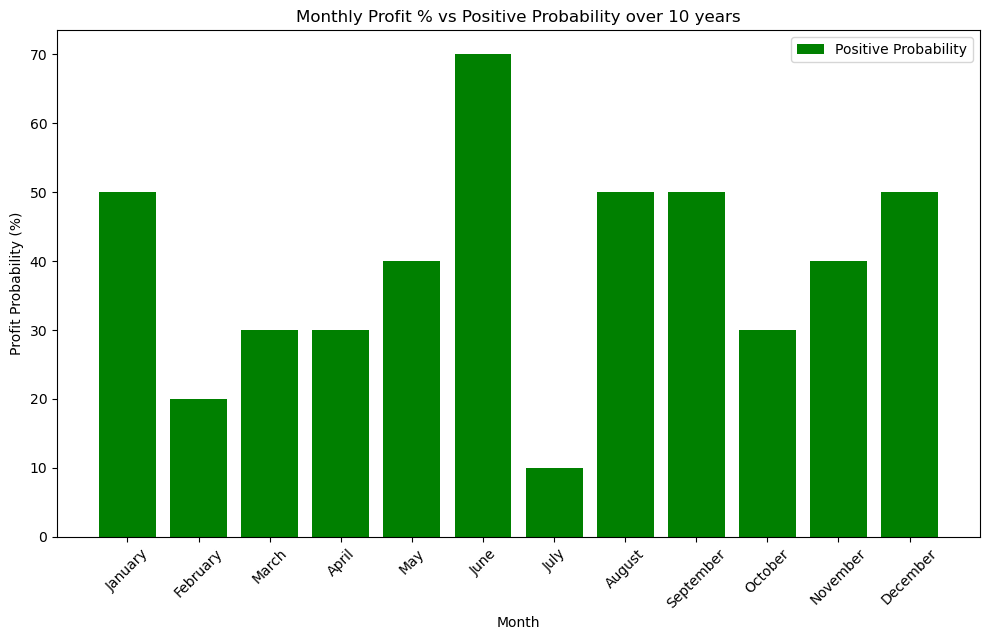

In [9]:
plt.figure(figsize=(10,6))

plt.bar(monthly_positive_counts["Month"], monthly_positive_counts["Positive_Prob"], color='green', label='Positive Probability')

plt.xlabel('Month')
plt.ylabel('Profit Probability (%)')
plt.title('Monthly Profit % vs Positive Probability over 10 years')
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("output_data/MonthlyProfits_PositiveProb.png")
plt.show()
